# Victor Karani
## victor.karani@gmail.com
## Spoiler Shield Mini Project 

## Uncover the Thrill, Shield the Surprise
### Business Problem
In the realm of user-generated reviews, especially when considering whether to watch a movie or TV show, reviews play a pivotal role in providing insights into the qualitative aspects of the content. However, these reviews often unintentionally disclose crucial plot details, commonly known as 'spoilers.' These spoilers can range from revealing the unexpected fate of a character to exposing the identity of a murderer in a crime-suspense movie. For potential viewers seeking an immersive and suspenseful experience, encountering spoilers can diminish the thrill associated with the uncertainty and curiosity of media consumption.

The challenge lies in devising a solution to effectively identify and flag these spoilers within entertainment reviews. By doing so, users can navigate review platforms with greater confidence, ensuring they maintain the excitement of discovering plot twists without unintentionally having key elements revealed beforehand. This business problem underscores the need for a robust and accurate model that can classify reviews based on their spoiler content, contributing to an enhanced user experience on platforms like IMDb.

### Key Business Objectives
**Optimized User Enjoyment:** Enhance user satisfaction by safeguarding against spoilers, fostering a more enjoyable IMDb experience.

**Informed User Choices:** Empower users with the ability to make informed decisions about reading reviews, preserving the excitement of media consumption.

**Heightened Platform Loyalty:** Increase user loyalty and engagement on IMDb by actively addressing and solving the spoiler-related concerns of the audience.

### Deep Learning Problem
The core of our project involves employing Natural Language Processing (NLP) techniques, specifically deep learning models, to address the challenge of identifying spoilers in IMDb reviews. The task at hand is a binary classification problem: given a review, the model needs to determine whether it contains spoilers or not. This involves understanding the contextual nuances and language intricacies that signify potential plot revelations.

### Technical Objectives
#### Text Preprocessing
*   Tokenization: Breaking down reviews into individual words or subword units to create a meaningful input format for the model.
*   Padding: Ensuring uniform length of input sequences to facilitate efficient batch processing.

#### Training/Fine-Tuning
*  Choosing an appropriate architecture is pivotal for the success of our spoiler prediction model.
*  Considering the sequential nature of text data, recurrent neural networks (RNNs), Long Short-Term Memory networks (LSTMs), or Transformer architectures could be explored.
*  Additionally, leveraging pre-trained embeddings such as Word2Vec, GloVe, or more advanced contextual embeddings like BERT may enhance the model's ability to capture intricate language patterns.
*  Train a model from scratch or used a pretrained model like BERT along with Text Classification

#### Evaluation
Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score on the test set. Insightful analysis of false positives and false negatives will provide valuable feedback for model improvement.

### About the Dataset
The IMDB Spoiler Dataset comprises two primary files, providing a comprehensive collection of user-generated reviews and metadata about movies and TV shows.

1.   IMDB_reviews.json:
2.   *    review_date: Date when the review was written.
   *    movie_id: A unique identifier for the item, linking it to corresponding metadata in the IMDB_movie_details.json file.
   *    user_id: A unique identifier for the author of the review.
is_spoiler: A binary indicator specifying whether the review contains spoilers or not.
   *    review_text: The textual content of the user's review, providing insights into their opinions and thoughts about the item.
   *    rating: The numerical rating assigned by the user to the item.
   *    review_summary: A concise summary accompanying the review, offering a quick overview of the user's sentiments.


1. IMDB_movie_details.json:
   *    movie_id: A unique identifier linking to the corresponding reviews in the IMDB_reviews file.
   *    plot_summary: A non-spoiler plot summary providing a brief overview of the item's storyline.
   *    duration: The runtime duration of the item.
   *    genre: The associated genres of the item.
   *    rating: The overall rating assigned to the item.
   *    release_date: The date when the item was released.
   *    plot_synopsis: A detailed synopsis of the item's plot, potentially containing spoiler content.

This dual-file dataset allows for a holistic understanding of user reviews, incorporating both textual sentiments and metadata associated with the movies and TV shows. The inclusion of spoiler indicators and non-spoiler plot summaries provides a valuable foundation for training and evaluating a deep learning model aimed at predicting and identifying spoilers within user reviews.

# Data Collection, Exploration and Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Data Collection
# Load the IMDB_reviews.json and the IMDB_movie_details.json
data_reviews = pd.read_json('/kaggle/input/imdb-spoiler-dataset/IMDB_reviews.json', lines=True)
data_movies = pd.read_json('/kaggle/input/imdb-spoiler-dataset/IMDB_movie_details.json', lines=True)


### **Reviews Overview**

In [3]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [4]:
data_reviews.shape

(573913, 7)

In [5]:
data_reviews.isnull().sum()

review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
dtype: int64

In [6]:
data_reviews.head(10)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
5,12 August 2004,tt0111161,ur1532177,True,In recent years the IMDB top 250 movies has ha...,8,"Good , But It Is Overrated By Some"
6,9 October 2005,tt0111161,ur6574726,True,I have been a fan of this movie for a long tim...,9,This Movie Saved My Life.
7,4 February 2012,tt0111161,ur31182745,True,I made my account on IMDb Just to Rate this mo...,10,Movie you can see 1000 times
8,24 October 2008,tt0111161,ur9871443,True,"A friend of mine listed ""The Shawshank Redempt...",10,The Shawshank Redemption
9,30 July 2011,tt0111161,ur2707735,True,Well I guess I'm a little late to the party as...,10,"""I'm a convicted murderer who provides sound f..."


### Reviews Comments:
**7** columns and **573913** rows. Looks like there is plenty of data. Most important column data are the **'review_text'**. The labels are in **'is_spoiler'**. Data is clean with no nulls

### **Movies Overview**

In [7]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


In [8]:
data_movies.shape

(1572, 7)

In [9]:
data_movies.isnull().sum()

movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

In [10]:
data_movies.isna().sum()

movie_id         0
plot_summary     0
duration         0
genre            0
rating           0
release_date     0
plot_synopsis    0
dtype: int64

In [11]:
data_movies.head(10)

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...
5,tt0286716,"Bruce Banner, a brilliant scientist with a clo...",2h 18min,"[Action, Sci-Fi]",5.7,2003-06-20,Bruce Banner (Eric Bana) is a research scienti...
6,tt0090605,57 years after Ellen Ripley had a close encoun...,2h 17min,"[Action, Adventure, Sci-Fi]",8.4,1986-07-18,"After the opening credits, we see a spacecraft..."
7,tt0243155,Bridget Jones is an average woman struggling a...,1h 37min,"[Comedy, Drama, Romance]",6.7,2001-04-13,Bridget Jones (adorably played by Renee Zellwe...
8,tt0121765,"Ten years after the invasion of Naboo, the Gal...",2h 22min,"[Action, Adventure, Fantasy]",6.6,2002-05-16,The opening crawl reveals that the Galactic Re...
9,tt0443453,Borat Sagdiyev is a TV reporter of a popular s...,1h 24min,[Comedy],7.3,2006-11-03,Borat Sagdiyev is a TV reporter of a popular s...


### Movies Comments:
**1572** movies. 

We care about:

*   **movie_id** to link to the movie reviews (data) df
*   **Plot summary**: This is the official summary for the movie and contains no spoilers. This may be useful in later ML processing.
*   **Plot synopsis**: This has spoiler information and WILL be useful in finding out what spoiler embeddings are like

Movie data is also clean with no nulls

## **Combine the 2 Datasets**

In [12]:
data = pd.merge(data_reviews, data_movies, on='movie_id', how='left')

In [13]:
data.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating_x', 'review_summary', 'plot_summary', 'duration', 'genre',
       'rating_y', 'release_date', 'plot_synopsis'],
      dtype='object')

In [14]:
data.head(5)

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [15]:
data.shape

(573913, 13)

## Check for NAN in combined data and clean

In [16]:
rows_with_column_nan = data[data['plot_synopsis'].isna()]
print(rows_with_column_nan)

             review_date   movie_id     user_id  is_spoiler  \
495798    29 August 2006  tt0104014   ur0039450       False   
495799      16 July 2012  tt0104014   ur5358902       False   
495800   25 October 2015  tt0104014  ur63416246       False   
495801  14 February 2006  tt0104014   ur2851731       False   
495802     11 April 2008  tt0104014  ur10916790       False   
529802      25 July 2010  tt0114142   ur6302267       False   
529803  27 December 2000  tt0114142   ur0982623       False   

                                              review_text  rating_x  \
495798  This must be one of the most erotic films ever...        10   
495799  Tinto Brass is usually referred to as either a...         7   
495800  One of the best erotic movies of all times. Mo...         8   
495801  call me crass, but i preferred the higher titi...         3   
495802  I heard Tinto Brass did eroticism, fine. I hea...         1   
529802  Yet another erotic thriller involving a web of...         3  

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [17]:
data.dropna(inplace=True)
data.shape

(573906, 13)

### Removed 7 rows with 'NaN'

## **Explore the combined dataset**

### 1. Analyze the Class Distribution

### Check the frequency of is_spoiler 'True' vs 'False'

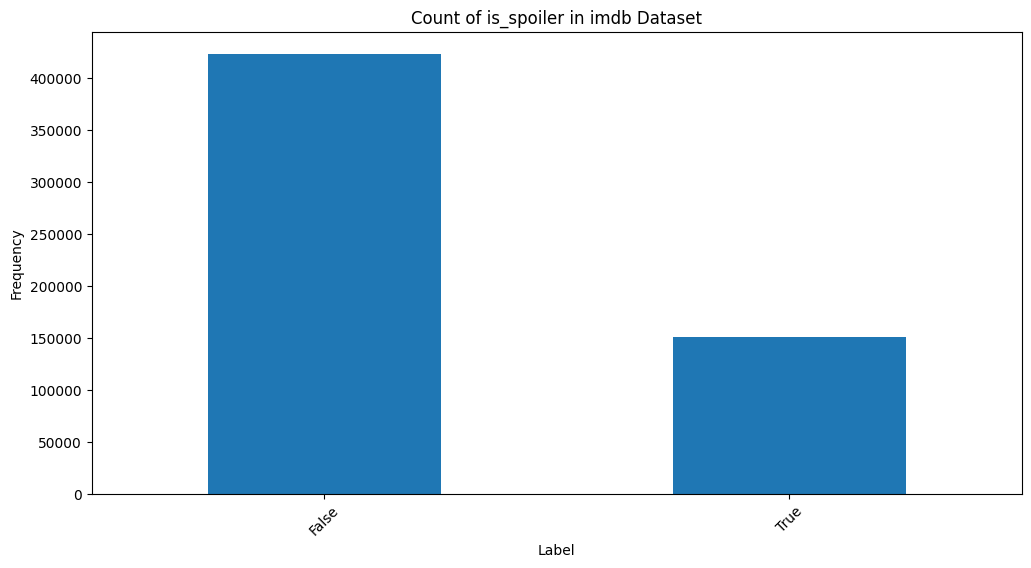

In [18]:
def plot_value_count(data): 

  # count occurences of each label
  label_counts = data['is_spoiler'].value_counts()

  # Create a bar plot
  plt.figure(figsize=(12, 6))
  label_counts.plot(kind='bar')

  # Set labels and title
  plt.xlabel('Label')
  plt.ylabel('Frequency')
  plt.title('Count of is_spoiler in imdb Dataset')
  plt.xticks(rotation=45)
  plt.show()


plot_value_count(data)

### Analyze is_spoiler distribution
There are way more Is_spoiler == False than True. This may cause challenges later on when training the dataset because it is unbalanced. There are 422601 False and 150862 True for is_spoiler

### 2. Analyze the Word count distribution

In [19]:
# Add a new word count column (for reviews)
data['word_count'] = data['review_text'].apply(lambda x: len(str(x).split()))
data.head(5)

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis,word_count
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",843
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",223
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",250
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",741
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",829


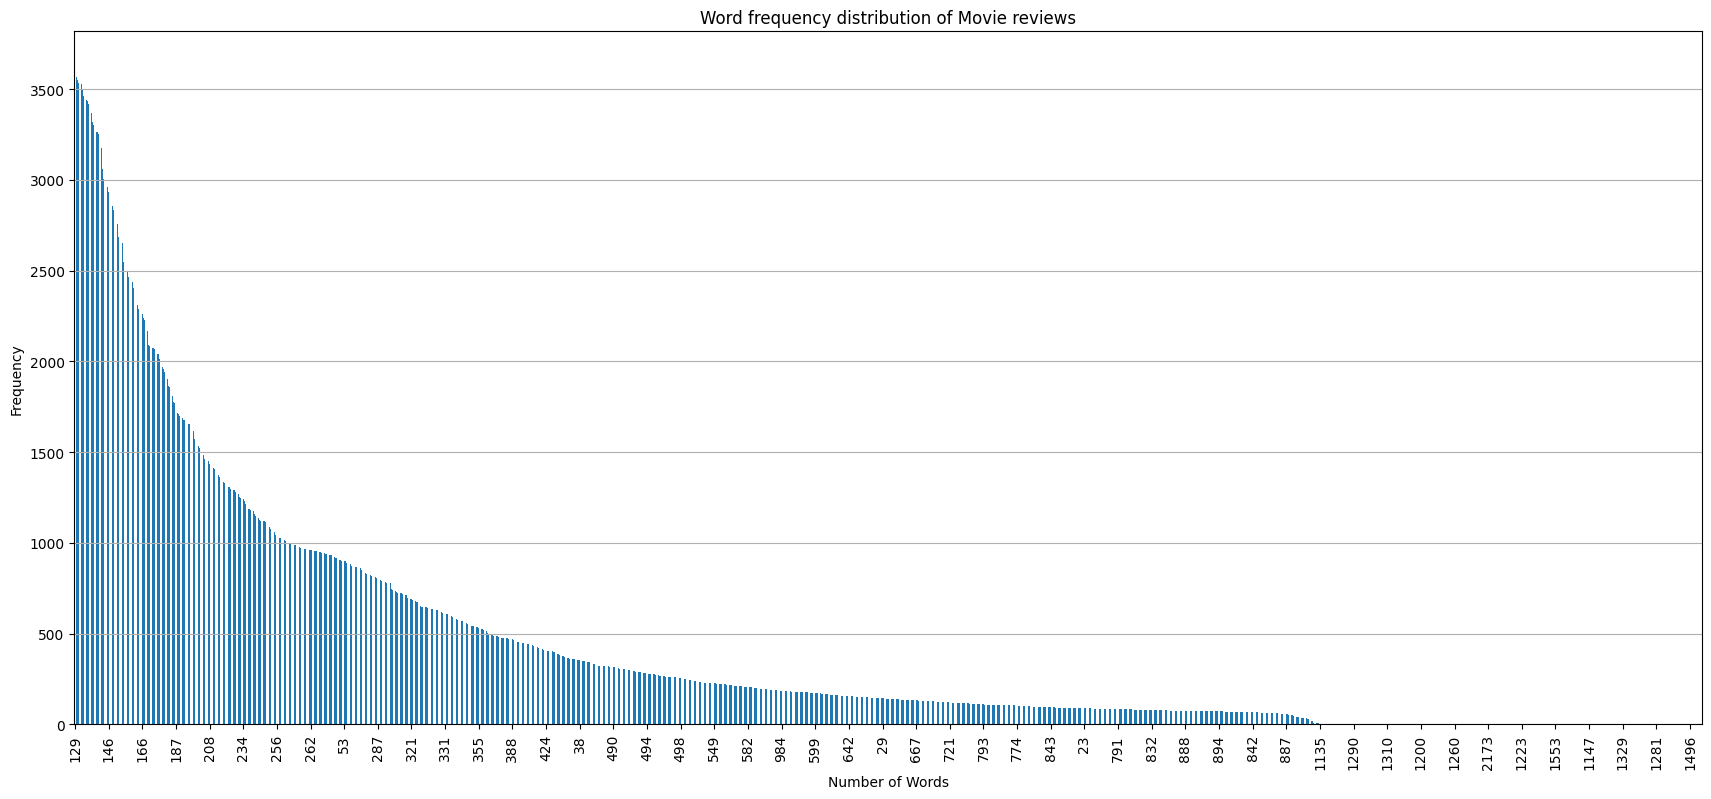

In [20]:
#Plot the Word count distribution for reviews
frequency_distribution = data['word_count'].value_counts()
plt.figure(figsize=(21, 9))
frequency_distribution.plot(kind='bar')
plt.title('Word frequency distribution of Movie reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.locator_params(axis='x', nbins=50) # Aim for around 50 ticks
plt.grid(axis='y')
plt.show()

### Word count analysis
Looks like most reviews are around 129 words per review, with very few above 1000 words

### 3. Create a Word Cloud

In [21]:
# Remove stopwords
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

#download stopwords
nltk.download('stopwords')

#get english stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  if isinstance(text, str):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
  return text  


#Apply the function to reviews
data['cleaned_review_text'] = data['review_text'].apply(remove_stopwords)

data.head(5)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis,word_count,cleaned_review_text
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",843,"Oscar year, Shawshank Redemption (written dire..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",223,Shawshank Redemption without doubt one brillia...
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",250,"believe film best story ever told film, tell w..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",741,"**Yes, SPOILERS here**This film emotional impa..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",829,heart extraordinary movie brilliant indelible ...


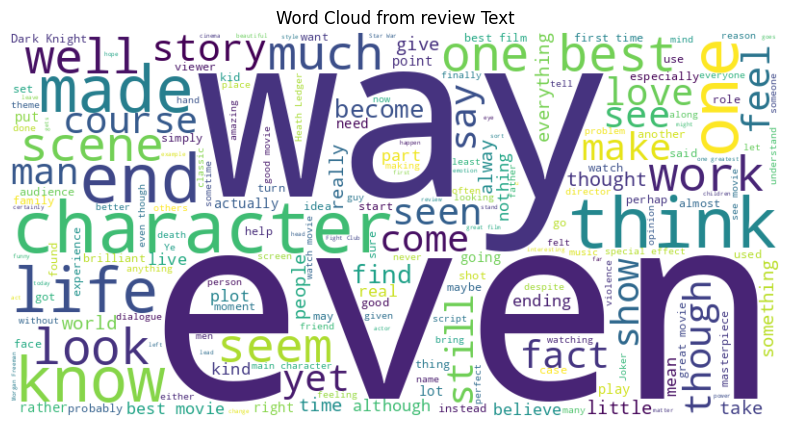

In [22]:
# Display the Wordcloud.

# Note that the entire dataset will CRASH the session because it will use up all the RAM.
# truncate to prevent this problem and get some idea with a smaller portion of the data.
data_truncated=data.head(100000)

combined_text = ' '.join(data_truncated['cleaned_review_text'])
# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
# Visualize the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud from review Text')
plt.show()

## 4. Calculate Similarity between reviews and plot summary

### TFIDF - cosine similarity

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#First, take care of any possible NaN's
data['review_text'].fillna('', inplace=True)
data['plot_summary'].fillna('', inplace=True)

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(data['review_text'].tolist() + data['plot_summary'].tolist())
similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]


print("TF-IDF Similarity matrix revew_text and plot_summary")
print( np.round(similarity,2))


<ipython-input-23-9dc4811dd7ba>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_text'].fillna('', inplace=True)
<ipython-input-23-9dc4811dd7ba>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

TF-IDF Similarity matrix revew_text and plot_summary
0.39


# TF-IDF Analysis
Looks like there is a decent similarity between  the review texts and the plot summary

In [24]:
data.head(5)

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis,word_count,cleaned_review_text
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",843,"Oscar year, Shawshank Redemption (written dire..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",223,Shawshank Redemption without doubt one brillia...
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",250,"believe film best story ever told film, tell w..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",741,"**Yes, SPOILERS here**This film emotional impa..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",829,heart extraordinary movie brilliant indelible ...


# Text Preprocessing
Note that I am using BERT which likes to have unprocessed (raw) text. I will not remove any stopwords or do any similar cleaning before passing data into BERT


## Model Training - Tips and Tricks that I used

- I used **smaller subset(s)** of the dataset. I varied from really small sizes for quick feedback when tuning hyperparameters and trying different architectures.
- I also used balanced datasets when possible to improve the performance overall for True/False cases.
- I tried 3 different approaches. In all the cases, I would use a frozen BERT head (or several heads) followed by a classifier

### Model 1
Single BERT head , all inputs (reviews,synopsis) concatenated into the single BERT head and then through the classifier. This had really poor results with an accuracy barely over 50%

### Model 2
Classic Dual tower BERT head with 2 heads for reviews and synopsis. This used 2 separate heads for the 2 inputs which got concatenated before the classifier. The results really improved with an accuracy of 61%


### Model 3 (shown in this notebook)
Flush with the success of the 2 tower method, I added another one for the plot_summary. I tried different ways of combining these
- subtract the plot_summary embeddings from the synopsis and concatenate the result into the reviews then classify
- Add the plot_summary embeddings from the synopsis and concatenate the result into the reviews then classify
- Directly concatenate all 3 (reviews,synopsis,plot_summary) and then classify
All these seemed to have similar performance to Model 2, although there was a slightly better training to validation loss.

All of these are explained in excrucuating detail in the attached hyperparameter tuning document

I used Kaggle which was a LIFE SAVER. I could not have done the project without it.

### Convert is_spoiler from True/false to 1/0 

In [26]:
data['is_spoiler'] = data['is_spoiler'].astype(int)

In [27]:
!pip install transformers

In [28]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
#from transformers import BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Create the Dataset class  

In [29]:
class SpoilerDataset(Dataset):
    #def __init__(self, texts,labels, tokenizer, max_length):
    def __init__(self, df_texts, df_labels, tokenizer, max_length):
      self.dataframe = df_texts
      self.reviews = df_texts['review_text'].reset_index(drop=True)
      self.synopsis = df_texts['plot_synopsis'].reset_index(drop=True)
      self.plot_summary = df_texts['plot_summary'].reset_index(drop=True)
      self.labels = df_labels.reset_index(drop=True)
      self.tokenizer = tokenizer
      self.max_length = max_length

    def __len__(self):
      return len(self.dataframe)

    def __getitem__(self, idx):
        reviews = self.reviews[idx]# Access using the reset index
        synopsis = self.synopsis[idx]# Access using the reset index
        plot_summary = self.plot_summary[idx]# Access using the reset index
        label = self.labels[idx]# Access using the reset index
        reviews_encoding = self.tokenizer(reviews, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        synopsis_encoding = self.tokenizer(synopsis, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        plot_summary_encoding = self.tokenizer(plot_summary, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        return {
            'reviews_input_ids': reviews_encoding['input_ids'].flatten(),
            'reviews_attention_mask': reviews_encoding['attention_mask'].flatten(),
            'synopsis_input_ids': synopsis_encoding['input_ids'].flatten(),
            'synopsis_attention_mask': synopsis_encoding['attention_mask'].flatten(),
            'plot_summary_input_ids': plot_summary_encoding['input_ids'].flatten(),
            'plot_summary_attention_mask': plot_summary_encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }


### Create the Classifier
The classifier has the default pretrained 'bert-base-uncased' model
On top of that, we add a fully connected layer with dropout to perform our classification.

We will also freeze all the BERT layers and only perform training on the Linear output layer.

In [30]:
class SpoilerClassifier(nn.Module):
  def __init__(self) -> None:
     super(SpoilerClassifier, self).__init__()

     #reviews
     self.reviews_bert= BertModel.from_pretrained('bert-base-uncased')
     #FREEZE all reviews bert layers
     for param in self.reviews_bert.parameters():
       param.requires_grad = False

     #synopsis
     self.synopsis_bert= BertModel.from_pretrained('bert-base-uncased')
     #FREEZE all reviews bert layers
     for param in self.synopsis_bert.parameters():
       param.requires_grad = False

     #plot_summary
     self.plot_summary_bert = BertModel.from_pretrained('bert-base-uncased')
     for param in self.plot_summary_bert.parameters():
       param.requires_grad = False

     # Add dropout to reduce overfit
     self.dropout = nn.Dropout(0.1)
     # Add fully connected layers for fine-tuning
     self.fc1 = nn.Linear(2304, 768) # concat review, summary and synopsis (note 2304 = 3*bert.config.hidden_size)
     self.fc2 = nn.Linear(768, 384)
     self.fc3 = nn.Linear(384, 128)
     self.fc4 = nn.Linear(128,128)
     self.fc5 = nn.Linear(128, 2)


  def forward(self, reviews_input_ids, synopsis_input_ids, reviews_attention_mask, synopsis_attention_mask, plot_summary_input_ids, plot_summary_attention_mask):
     # Pass the input through the BERT model

      outputs_reviews = self.reviews_bert(input_ids=reviews_input_ids, attention_mask=reviews_attention_mask)
      outputs_synopsis = self.synopsis_bert(input_ids=synopsis_input_ids, attention_mask=synopsis_attention_mask)
      outputs_plot_summary = self.plot_summary_bert(input_ids=plot_summary_input_ids, attention_mask=plot_summary_attention_mask)

      pool_output_reviews = outputs_reviews.pooler_output
      pool_output_synopsis = outputs_synopsis.pooler_output
      pool_output_plot_summary = outputs_plot_summary.pooler_output


      #Combine plot_summary and synopsis first. I tried several methods with pretty similar performance
      
      # try the direct difference first
      #pool_output_spoilers = pool_output_plot_summary - pool_output_synopsis # Straight difference between summary and synopsis

      # try addition  
      #pool_output_spoilers = pool_output_plot_summary + pool_output_synopsis # Straight addition between summary and synopsis

      # try concatenation
      pool_output_spoilers = torch.cat((pool_output_plot_summary , pool_output_synopsis ),dim=1)   # concatenation between summary and synopsis
      

      #combine the spoilers and the reviews
      # Reasoning: at this point you have the embedding for the spoilers (pool_output_spoilers) and the review embeddings, so combining these gives the highest probability of
      # identifying spoilers when passed through the Fully connected NN
      pool_output = torch.cat((pool_output_reviews, pool_output_spoilers), dim=1)


      # Apply dropout
      drop_output = self.dropout(pool_output)

      # Pass the output through the fully connected layer
      linear1_output = self.fc1(drop_output)
      linear2_output = self.fc2(linear1_output)
      linear3_output = self.fc3(linear2_output)
      #logits = self.fc3(linear2_output)
      linear4_output = self.fc4(linear3_output)
      logits=self.fc5(linear4_output)
      return logits

### Define the train function

In [31]:
def train(model, dataloader, optimizer, scheduler, device):
  model.train()
  epoch_train_loss=0
  for batch in dataloader:
    optimizer.zero_grad()
    reviews_input_ids = batch['reviews_input_ids'].to(device)
    synopsis_input_ids = batch['synopsis_input_ids'].to(device)
    reviews_attention_mask = batch['reviews_attention_mask'].to(device)
    synopsis_attention_mask = batch['synopsis_attention_mask'].to(device)
    plot_summary_input_ids = batch['plot_summary_input_ids'].to(device)
    plot_summary_attention_mask = batch['plot_summary_attention_mask'].to(device)
    labels = batch['label'].to(device)
    outputs = model(reviews_input_ids, synopsis_input_ids, reviews_attention_mask,synopsis_attention_mask ,plot_summary_input_ids ,plot_summary_attention_mask)
    #Classification, so use crossentropy Loss
    loss = nn.CrossEntropyLoss()(outputs, labels)
    loss.backward()
    optimizer.step()
    scheduler.step()
    epoch_train_loss += loss.item()
  avg_train_loss = epoch_train_loss / len(dataloader)
  return avg_train_loss,num_epochs


### Build Evaluation method

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def evaluate(model, data_loader, device):
  model.eval()
  predictions = []
  true_labels = []
  epoch_eval_loss=0
   # Initialize the loss function
  loss_fn = nn.CrossEntropyLoss()
  with torch.no_grad():
    for batch in data_loader:
      reviews_input_ids = batch['reviews_input_ids'].to(device)
      synopsis_input_ids = batch['synopsis_input_ids'].to(device)
      reviews_attention_mask = batch['reviews_attention_mask'].to(device)
      synopsis_attention_mask = batch['synopsis_attention_mask'].to(device)
      plot_summary_input_ids = batch['plot_summary_input_ids'].to(device)
      plot_summary_attention_mask = batch['plot_summary_attention_mask'].to(device)
      labels = batch['label'].to(device)
      #outputs = model(input_ids, attention_mask=attention_mask)
      outputs = model(reviews_input_ids, synopsis_input_ids, reviews_attention_mask, synopsis_attention_mask, plot_summary_input_ids, plot_summary_attention_mask)
      _, preds = torch.max(outputs, dim=1)
      predictions.extend(preds.cpu().numpy())
      true_labels.extend(labels.cpu().numpy())
      # Calculate the loss explicitly
      loss = loss_fn(outputs, labels)
      epoch_eval_loss += loss.item()
  avg_eval_loss = epoch_eval_loss / len(data_loader)
  return accuracy_score(true_labels, predictions), classification_report(true_labels, predictions), avg_eval_loss, confusion_matrix(true_labels, predictions)

### Set up parameters

In [33]:
# Parameters
bert_model_name = 'bert-base-uncased'
num_classes = 2
max_length = 128
batch_size = 16
num_epochs = 4
learning_rate = 5e-4

# Hyperparameter tuning
I went through alot of tests when selecting the hyperparameters above and in the rest of the notebook. The documentaton is extensive and is in the attached Build notes document.

## Load and split data
* First use a smaller dataset
* Then BALANCE the dataset
* Then test/train split

<ipython-input-34-f60b5043a01c>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_sample = (data.groupby('is_spoiler').apply(lambda x: x.sample(min(len(x), sample_size_per_class),random_state=42)).reset_index(drop=True))


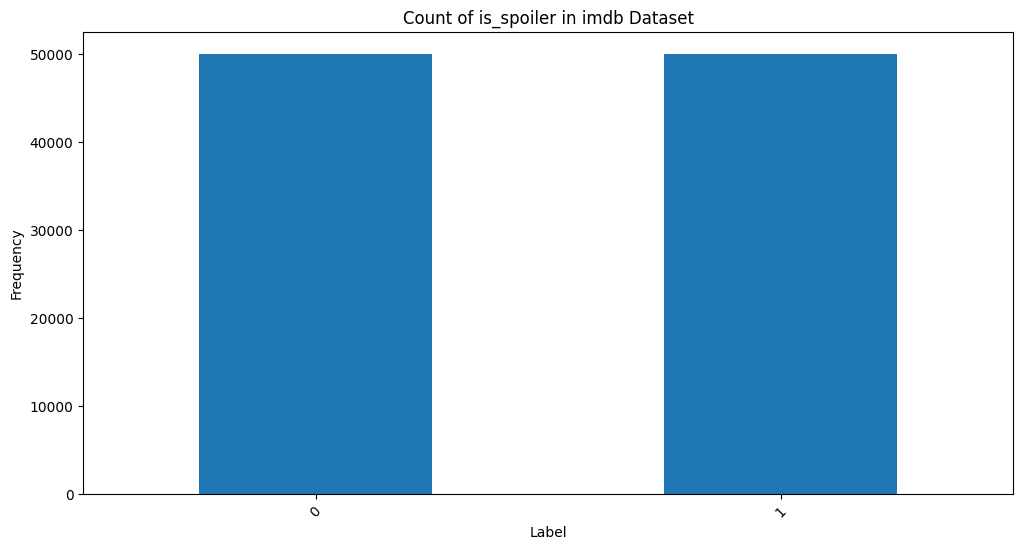

        review_date   movie_id    user_id  is_spoiler  \
0   5 December 2002  tt0120737  ur2072866           0   
1      27 July 2000  tt0120903  ur0487663           0   
2     10 March 2005  tt0317705  ur4468170           0   
3  22 December 2004  tt0212338  ur4436521           0   
4  14 November 2008  tt0472062  ur0855231           0   

                                         review_text  rating_x  \
0  Nobody expected Tolkien's bestseller to ever b...        10   
1  No manner of special effects can make up for a...         4   
2  Wow! "The Incredibles" packs quite a punch. Ha...        10   
3  I loved this movie. This movie introduced me t...        10   
4  Charlie Wilson's War might make for a fascinat...         8   

                                      review_summary  \
0                                The best film ever!   
1                      An insult to my intelligence.   
2                                         Increíble!   
3                                   

In [34]:
# First get a SMALL portion of the dataset to make training possible
# I used all these when performing hyperparameter tuning. See attached document
#sample_size_per_class = 500  # Number of samples per class
#sample_size_per_class = 1000  # Number of samples per class
#sample_size_per_class = 5000  # Number of samples per class
#sample_size_per_class = 10000  # Number of samples per class
#sample_size_per_class = 20000  # Number of samples per class
sample_size_per_class = 50000  # Number of samples per class
#sample_size_per_class = 70000  # Number of samples per class
#sample_size_per_class = 100000  # Number of samples per class

# Use a more balanced dataset with 1:1 between true and false. We can do this because we are subsampling
balanced_sample = (data.groupby('is_spoiler').apply(lambda x: x.sample(min(len(x), sample_size_per_class),random_state=42)).reset_index(drop=True))

# Plot data to REALLY make sure data is balanced
plot_value_count(balanced_sample)

print(balanced_sample.head(5))

#Perform train test split
train_texts_df, val_texts_df, train_labels_df, val_labels_df = train_test_split(balanced_sample[['review_text', 'plot_synopsis','plot_summary']], balanced_sample['is_spoiler'], test_size=0.2, random_state=42)

## That is Pretty well balanced now!

### Initialize tokenizer Dataset and data loader

In [35]:
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
train_dataset = SpoilerDataset(train_texts_df, train_labels_df, tokenizer, max_length)
val_dataset = SpoilerDataset(val_texts_df, val_labels_df, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Device and model

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpoilerClassifier().to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Optimizer and learning rate

In [37]:
# Make SURE the optimizer ONLY updates the parameters that require gradients
optimizer= torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

### Training the model

In [38]:
import matplotlib.pyplot as plt

#Train the model
training_losses=[]
validation_losses=[]
cm = None # update with the confusion matrix data from the most recent epoch
report = None # update with the classification report from the most recent epoch
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    avg_train_loss,num_epochs = train(model, train_dataloader, optimizer, scheduler, device)
    training_losses.append(avg_train_loss)
    print(f"Training loss: {avg_train_loss:.4f}")
    accuracy, report, avg_eval_loss,cm = evaluate(model, val_dataloader, device)
    validation_losses.append(avg_eval_loss)
    print(f"Validation loss: {avg_eval_loss:.4f}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

Epoch 1/4
Training loss: 0.6829
Validation loss: 0.6738
Validation Accuracy: 0.6015
              precision    recall  f1-score   support

           0       0.63      0.51      0.56     10035
           1       0.58      0.70      0.64      9965

    accuracy                           0.60     20000
   macro avg       0.61      0.60      0.60     20000
weighted avg       0.61      0.60      0.60     20000

Epoch 2/4
Training loss: 0.6683
Validation loss: 0.6569
Validation Accuracy: 0.6073
              precision    recall  f1-score   support

           0       0.61      0.58      0.60     10035
           1       0.60      0.63      0.62      9965

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000

Epoch 3/4
Training loss: 0.6626
Validation loss: 0.6648
Validation Accuracy: 0.5980
              precision    recall  f1-score   support

           0       0.70      0.35      

In [39]:
# Final classification report
print("Final Classification Report:")
print(report)

Final Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.61     10035
           1       0.61      0.64      0.63      9965

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



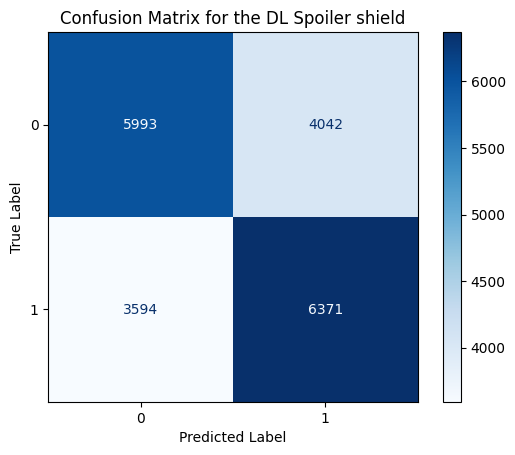

In [40]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for the DL Spoiler shield')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

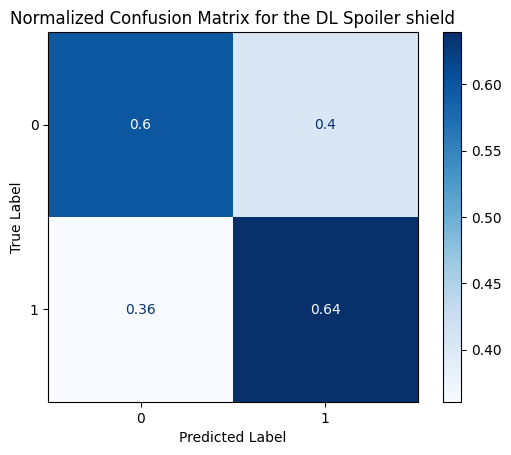

In [41]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp_normalized.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for the DL Spoiler shield')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

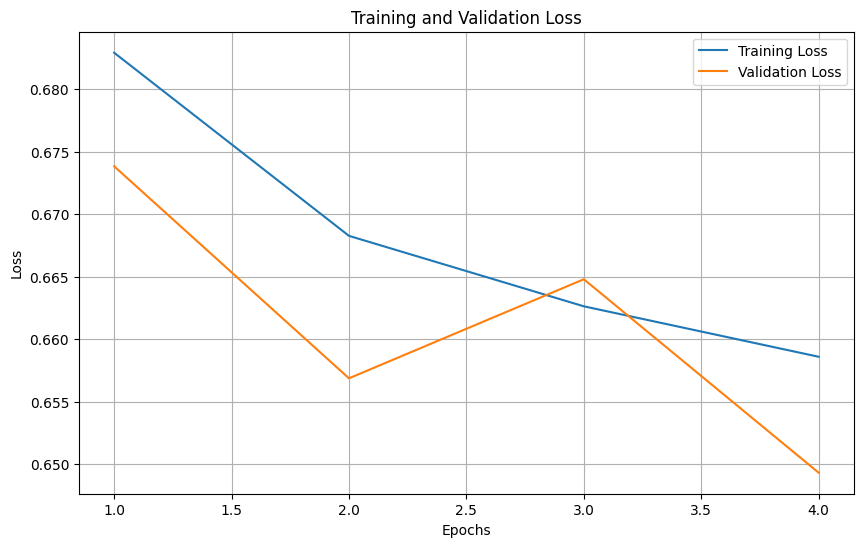

In [42]:
# Plot the training loss vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), training_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')
plt.show()

### Save the Final Model

In [43]:
torch.save(model.state_dict(), "DL_mini_spoiler.pth")
import shutil
shutil.move('DL_mini_spoiler.pth', '/kaggle/working/DL_mini_spoiler.pth') 

'/kaggle/working/DL_mini_spoiler.pth'

# Result Analysis
## 1) Number of samples chosen
When developing the model, I moved around with smaller and larger portions of the dataset. I eventually settled on 50000 points each in (1/0) is_spoiler. This seems large enough to cover the model characteristics but be able to run in kaggle

## 2) Balancing the dataset
This ensured that the precision, recall, accuracy and f1 score are all mostly above 60% for BOTH the T/F (1/0) cases for the is_spoiler. This is very important. I did some initial tests (shown in Build notes doc) which present very uneven performance when the dataset is unbalanced .

## 3) Validation loss
The model validation loss hasn't bottomed out at 4 epochs. I could have kept going with more epochs but a single run of this notebook burned through 24 of my 30 weekly kaggle hours in one shot.I would need serious compute time to run more epochs.

## 4) Performance Metrics
I chose precision, recall, accuracy and f1 score as the metrics for this model. They all end up uniformly in the low 60% which is as good as it gets with my approach

## Post training evaluation

It is a good idea to test the dataset on a completely new set of data with is not the same as was used for training. 

This is what I do next

In [44]:
#load post training dataset. 
sample_size_per_class = 1000  # Number of samples per class

#Use a more balanced dataset with 1:1 between true and false. We can do this because we are subsampling
balanced_sample_post_eval = (data.groupby('is_spoiler').apply(lambda x: x.sample(min(len(x), sample_size_per_class),random_state=42)).reset_index(drop=True))

post_train_texts_df = balanced_sample_post_eval[['review_text', 'plot_synopsis','plot_summary']]
post_train_labels_df = balanced_sample_post_eval['is_spoiler']

<ipython-input-44-0909c63aba06>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_sample_post_eval = (data.groupby('is_spoiler').apply(lambda x: x.sample(min(len(x), sample_size_per_class),random_state=42)).reset_index(drop=True))


In [45]:
#Dataset and data loader
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
post_train_dataset = SpoilerDataset(post_train_texts_df, post_train_labels_df, tokenizer, max_length)
post_train_dataloader = DataLoader(post_train_dataset, batch_size=batch_size)

In [46]:
#Device and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_post_eval = SpoilerClassifier().to(device)
model_post_eval.load_state_dict(torch.load("/kaggle/working/DL_mini_spoiler.pth"))
model_post_eval.eval()

<ipython-input-46-b45d1103f0d7>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_post_eval.load_state_dict(torch.load("/kaggle/working/DL_mini_spoiler.pth"))


SpoilerClassifier(
  (reviews_bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [47]:
total_steps = len(post_train_dataloader) * num_epochs

In [48]:
import matplotlib.pyplot as plt

#Evaluate the model
validation_losses=[]
cm = None # update with the confusion matrix data from the most recent epoch
report = None # update with the classification report from the most recent epoch
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    accuracy, report, avg_eval_loss,cm = evaluate(model_post_eval, post_train_dataloader, device)
    validation_losses.append(avg_eval_loss)
    print(f"Validation loss: {avg_eval_loss:.4f}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

Epoch 1/4
Validation loss: 0.6519
Validation Accuracy: 0.6170
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      1000
           1       0.61      0.63      0.62      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000

Epoch 2/4
Validation loss: 0.6519
Validation Accuracy: 0.6170
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      1000
           1       0.61      0.63      0.62      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000

Epoch 3/4
Validation loss: 0.6519
Validation Accuracy: 0.6170
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      1000
           1       0.61      0.63      0.62      10

In [49]:
# Final Post training classification report
print("Final Post training Classification Report:")
print(report)

Final Post training Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      1000
           1       0.61      0.63      0.62      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



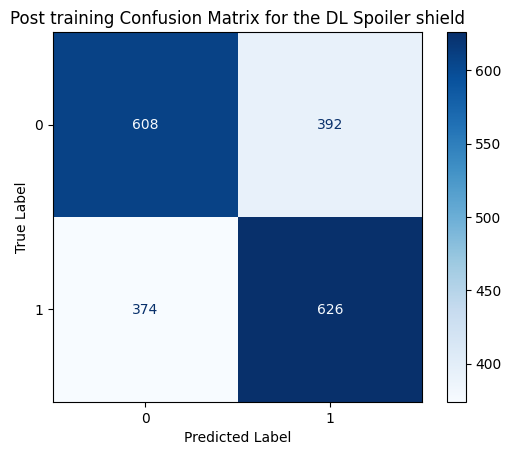

In [50]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Post training Confusion Matrix for the DL Spoiler shield')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

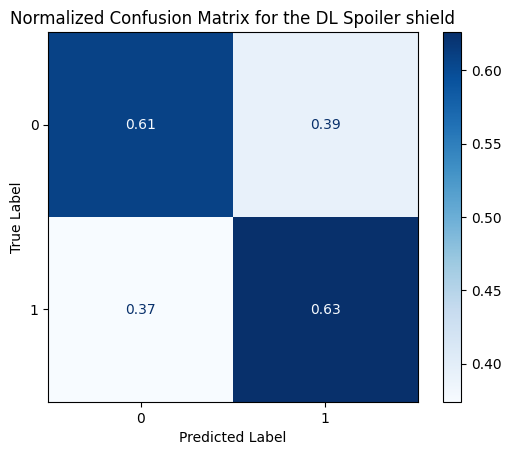

In [51]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp_normalized.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix for the DL Spoiler shield')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Post training comments
The confusion matrix performance is almost identical to the training dataset.
The Precision, recall, F1 Score and accuracy are almost identical to the training set. This means that the model is working as expected.

# Model Evaluation:
As described earlier, I used BERT with 3 towers here. One for each head (reviews, synopsis, plot_summary)


## Model 1 Evaluation (not presented here)
Model 1, the first one that I tried had the reviews and synopsis concatenated onto one large string and fed into a single BERT head followed by a fully connected classifier.

The performance was not that great, with precision, recall, f1 score and  accuracy under 60%. So I decided to move onto the 2 tower model

Detailed information about my testing for this model is included in my mini project build notes document

## Model 2 Evaluation (not presented here)
Model 2 was a classic 2 tower with thre reviews and synopsis passed through their own heads. The results of those then got concatenated and passed through the fully connected classifier

The performance was consistently around 61% for precision, recall, F1 score and accuracy even for large training samples 

Detailed information about my testing for this model is included in my mini project build notes document

## Model 3 Evaluation (presented here)
I decided to add another head which handled the plot_summary, which I thought would give me more context for the model. I call this the 3-tower model.

Turns out that it was not much better than the plain 2 tower but probably has some more potential in it.

The performance was consistently around 61% for precision, recall, F1 score and accuracy even for large training samples 


## Future work
Despite what I think was exhaustive trial with my '3 tower' model, I feel that there is still may be more performance available from adding the plot_summary.

I tried the NSP bert model but ran into issues with truncation because the provided text samples are (mostly) over the 512 token limit. If I had more time, I could probably figure this out but ran out of time for this project. 

Having said that, NSP and NLI (which I did not try) may give better results. Even so, I think above 60% for all precision, recall, F1 score and accuracy is pretty good.

### Bottom line
Bottom line is that the is_spoiler data is probably noisy. I don't think there is any way to make this perform significantly better without cleaning up the data